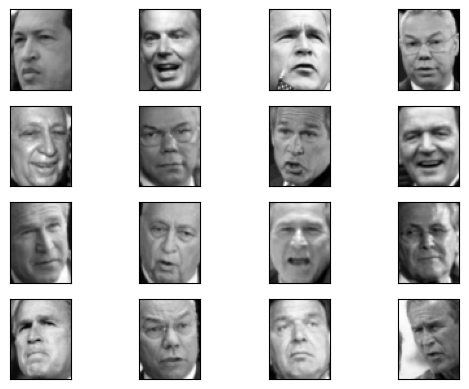

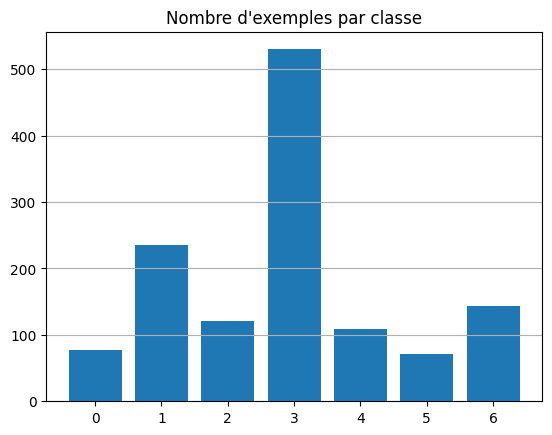

In [1]:
from display import plotHistoClasses, plotGallery
import numpy as np
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
plotGallery(X)
plotHistoClasses(y)

There are 7 classes. We can check this at the variables lookup on the left under the variable "name". In total we have 1288 images and their size is 62x47

The images are provided on the "y" variable and "X" provides the information for every image including its size.

The 16 images that are printed are the first 16 persons according to the documentation of the file display.py.

**The classes are not equiprobable, since we can see that on the Histogram, the different classes have different number of images each. Others have more and have less.**



### Identifying the 16 people that have been printed

5
[[ 63.333332  71.        77.333336 ... 190.33333  157.33333  134.66667 ]
 [ 70.        74.333336  78.333336 ... 195.33333  162.66667  135.66667 ]
 [ 72.333336  75.666664  78.       ... 196.66667  173.33333  143.33333 ]
 ...
 [ 30.        87.       148.33333  ...  88.666664 110.       114.333336]
 [ 17.666666  49.333332 116.666664 ...  78.666664 109.333336 116.      ]
 [ 15.        24.333334  79.333336 ...  56.        94.333336 111.666664]]


# Partitioning the database

We want to partionate the databse like this: 15% for testing, 15% for validation and 70% for training.

## Procedure
We want to split the dataset into train, validation, and test sets with proportions:
- Train: 70%
- Validation: 15%
- Test: 15%

First, we split into train/test with 15% for testing:
X_train_val: 85% of N
X_test: 15% of N

Then, we further split X_train_val into train and validation with 15% for validation:

> This means we want the validation set to be 15% of the total dataset, which is 15% of N.

We need to calculate the ratio of the validation set size to the X_train_val size.

**Let's denote the size of the validation set as Val and the size of X_train_val as TrainVal.**
We want Val / N = 0.15

And TrainVal / N = 0.85

We also want Val / TrainVal = x
Substituting TrainVal with 0.85N:
Val / (0.85N) = x

Val = 0.15N

0.15N / (0.85N) = x

x = 0.15 / 0.85

x ≈ 0.1765



> Therefore, we need to split X_train_val into train and validation with a test_size of approximately 0.1765 to achieve a 15% validation set from the total dataset.

There is also the simple way to take 70% and then divide it by 2 as seeon below.


In [2]:
from sklearn.model_selection import train_test_split

# Split data into train/test sets with 15% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Further split the train/validation set into train and validation sets with 15% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42) # 0.1765 is calculated to get 15% of the total dataset for validation

# Other way to do that is more simple to undertstand is:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

We can see on the variables inspector that there are 900 images for training (y_train), and 194 for testing and validation on each y_test and y_val.

The dimension are:

*   X_val : 194x62x47
*   X_test : 194x62x47
*   X_train : 900x62x47
*   y_val : 193
*   y_test : 194
*   y_train : 900

Some times we will see that 900 is 901 and _val is of dimensions 193 instead of 194.



# Redimensioning the data

In [4]:
# prompt: Pour réaliser une classification par kppv, on utilise un codage rétinien. Chaque image est donc
# représentée par un vecteur de caractéristique de dimension 𝑛 = 2914. Redimensionner X_train,
# X_val et X_test de façon à ce qu’ils aient pour dimension 𝑁 x 𝑛 (np.reshape()) où N est le
# nombre d’exemples.

import numpy as np

n = 2914  # Dimension of the feature vector. We obtain it from 62x47

X_train_reshaped = X_train.reshape(X_train.shape[0], n)
X_val_reshaped = X_val.reshape(X_val.shape[0], n)
X_test_reshaped = X_test.reshape(X_test.shape[0], n)

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)


X_train_reshaped shape: (901, 2914)
X_val_reshaped shape: (193, 2914)
X_test_reshaped shape: (194, 2914)


# Mise en forme des données pour la classification

In [5]:
# prompt: Mettre en forme les données (train_reshaped, val_reshaped et test_reshaped) en utilisant la classe StandardScaler. On estimera
# la moyenne et l’écart-type de chaque dimension sur les données d’apprentissage, puis on
# transformera les données (train val et test) en utilisant ces valeurs.

from sklearn.preprocessing import StandardScaler

# Initialising StandardScaler
scaler = StandardScaler()

# We apply the scaler from StandarScaler to the size of our data. It calculates the moyenne for every 1st pixel, then the moyenne for every2nd pixel etc. It does the same for the variance as well.
scaler.fit(X_train_reshaped) # We apply this only to the training data because we do not have the right to use the data from vaidation or tasting for that

# Transforming the data using the moyenne and the variance. The calculation behind it is: (X_train_reshaped - moyenne)/variance and repeated for the other databases
X_train_scaled = scaler.transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (901, 2914)
X_val_scaled shape: (193, 2914)
X_test_scaled shape: (194, 2914)


**The question is "A quoi consiste la mise en forme des données ? Comment sont-elles transformées ?"**

The process involves reshaping the image data from a 3D array (height x width x channels) into a 2D array (number of images x number of pixels). Subsequently, StandardScaler from scikit-learn is used to standardize the feature values by removing the mean and scaling to unit variance. This process helps improve the performance of machine learning algorithms that are sensitive to feature scaling.



> La mise en forme des données, en particulier la mise à l'échelle des caractéristiques, est appliquée pour transformer les données dans ce code. Le processus implique de remodeler les données d'image à partir d'un tableau 3D (hauteur x largeur x canaux) en un tableau 2D (nombre d'images x nombre de pixels). Ensuite, StandardScaler de scikit-learn est utilisé pour standardiser les valeurs des caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire. Ce processus contribue à améliorer les performances des algorithmes d'apprentissage automatique qui sont sensibles à la mise à l'échelle des caractéristiques.



# A point to everything that has been done

Once we have our initial data, we need to reshape their form so that we can have an X_data that has on every line an image where the first collumn is the ID of the image and the second collumn includes the data of the image [ID, data_image_pixels].

Once we have received this one, we must standarize the data before we apply the KPPV algorithm. We need to that because the data are not forcement consistent between them, meaning that when we try to take the euclidian distance for an unknown data, the result won't be coherent. So we standarise the data using the scaler. To do that we take the reshpaed data where we extract the moyenne and the variance for every collumn of from data_image_pixels and we transform/standarize the data by using the formula (data - moyenne)/variance. This is done automaticly from the transform function.

Now we can move on and apply the KPPV.

# Applying KPPV algorithm



In [6]:
# prompt: Définir le classifieur 1PPV en utilisant la classe KNeighborsClassifier(). On souhaite utiliser la
# distance euclidienne et le 1PPV.
# Réaliser la classification des exemples de validation en utilisant la méthode predict().
# Afficher la matrice de confusion (fonction confusion_matrix()) et estimer le taux de
# reconnaissance à partir des éléments de cette matrice. Vérif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Defining the classifier 1PPV in order to use euclidian method for the distance and 1 neighboorh parameter as asked on the subject of the TP
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

# Taking the standarised database and we train it using the y_train
knn.fit(X_train_scaled, y_train) # We are putting the training data on the 1PPN

# We want to class the examples using predict from the SKlearn library as required on the subject
y_pred = knn.predict(X_val_scaled) # We compare the validation data via euclidian distance with the trained data and we receive the y_pred with the results.

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred) # We now place the original data and the predicted data to the confusion matrix
print("Matrice de confusion :\n", cm)

# Calculer le taux de reconnaissance
accuracy = accuracy_score(y_val, y_pred) # Allowing to find the taux de reconnaisance. On the cours we said that we do the somme of the diagonal divided by the number total of the natrix.
print("Taux de reconnaissance K = 1:", accuracy) # The taux de reconnaisance allow us to compare other KPPVs in order to select the best K value for our final testing.


Matrice de confusion :
 [[ 2  2  1  2  1  0  0]
 [ 4 16  2  7  1  0  1]
 [ 2  2 10  4  0  0  0]
 [ 1  2  7 63  5  3  5]
 [ 1  0  1  3  5  0  2]
 [ 0  2  3  3  1  4  0]
 [ 0  4  1  6  1  1 12]]
Taux de reconnaissance K = 1: 0.5803108808290155


**Explications**

*   La matrice de confusion représente la distribution des prédictions du modèle par rapport aux vraies étiquettes.
*   La somme de la matrice de confusion représente le nombre total d'exemples dans l'ensemble de validation.
*   Les classes ne sont pas équilibrées, car le nombre d'exemples pour chaque classe n'est pas le même dans l'ensemble de données.
*    Le taux de reconnaissance (ou précision globale) représente le rapport entre le nombre de prédictions correctes et le nombre total de prédictions.



> The KPPV algorith is discriminating the data and do not need any hypothesis





# For K = 2

In [7]:
knn2 = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# Taking the standarised database and we train it using the y_train
knn2.fit(X_train_scaled, y_train) # We are putting the training data on the 1PPN

# We want to class the examples using predict from the SKlearn library as required on the subject
y_pred2 = knn2.predict(X_val_scaled) # We compare the validation data via euclidian distance with the trained data and we receive the y_pred with the results.

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred2) # We now place the original data and the predicted data to the confusion matrix
print("Matrice de confusion :\n", cm)

# Calculer le taux de reconnaissance
accuracy2 = accuracy_score(y_val, y_pred2) # Allowing to find the taux de reconnaisance. On the cours we said that we do the somme of the diagonal divided by the number total of the natrix.
print("Taux de reconnaissance K = 2 :", accuracy2) # The taux de reconnaisance allow us to compare other KPPVs in order to select the best K value for our final testing.


Matrice de confusion :
 [[ 2  4  1  1  0  0  0]
 [ 3 20  2  6  0  0  0]
 [ 1  3 11  3  0  0  0]
 [ 4  6 10 63  1  1  1]
 [ 1  1  2  5  2  0  1]
 [ 2  2  2  4  0  3  0]
 [ 0  3  2 10  4  0  6]]
Taux de reconnaissance K = 2 : 0.5544041450777202


# For K = 3

In [8]:
knn3 = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# Taking the standarised database and we train it using the y_train
knn3.fit(X_train_scaled, y_train) # We are putting the training data on the 1PPN

# We want to class the examples using predict from the SKlearn library as required on the subject
y_pred3 = knn3.predict(X_val_scaled) # We compare the validation data via euclidian distance with the trained data and we receive the y_pred with the results.

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred3) # We now place the original data and the predicted data to the confusion matrix
print("Matrice de confusion :\n", cm)

# Calculer le taux de reconnaissance
accuracy3 = accuracy_score(y_val, y_pred3) # Allowing to find the taux de reconnaisance. On the cours we said that we do the somme of the diagonal divided by the number total of the natrix.
print("Taux de reconnaissance K = 3 :", accuracy3) # The taux de reconnaisance allow us to compare other KPPVs in order to select the best K value for our final testing.


Matrice de confusion :
 [[ 2  4  1  1  0  0  0]
 [ 3 20  2  6  0  0  0]
 [ 1  3 11  3  0  0  0]
 [ 4  6 10 63  1  1  1]
 [ 1  1  2  5  2  0  1]
 [ 2  2  2  4  0  3  0]
 [ 0  3  2 10  4  0  6]]
Taux de reconnaissance K = 3 : 0.5544041450777202


We accept the 1PPV since it has the best taux de reconnaisance. The greater the taux is, the better the results are. **Now applying the X_test for verification of the results.**

In [9]:
# prompt: We accept the 1PPV since it has the best taux de reconnaisance. The greater the taux is, the better the results are. **Now applying the X_test for verification of the results.**

# On va entrainer le model avec knn.fit(X_train_scaled, y_train et apres on predict selon celui là)
y_pred_test = knn.predict(X_test_scaled)

# Matrice de confusion
cm_test = confusion_matrix(y_test, y_pred_test)
print("Matrice de confusion sur l'ensemble de test :\n", cm_test)

# Calculer le taux de reconnaissance
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Taux de reconnaissance sur l'ensemble de test :", accuracy_test)


Matrice de confusion sur l'ensemble de test :
 [[ 4  2  0  2  1  1  0]
 [ 2 21  2  6  5  2  0]
 [ 2  3  9  2  0  0  0]
 [ 0  5  1 59  4  4  7]
 [ 0  1  2  2  9  0  5]
 [ 0  0  0  2  2  2  0]
 [ 0  1  1  9  3  0 11]]
Taux de reconnaissance sur l'ensemble de test : 0.5927835051546392
